In [1]:
import sys
sys.path.append("/home/dima/Projects/thesis_tf")
sys.path.append("/home/dima/Projects/thesis_tf/slim")

In [2]:
from variational_autoencoder import VAE
import tensorflow as tf
import time
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:
checkpoint_folder_path = "model_slim"
checkpoint_step = -1
batch_size = 64

def run_generator_once(saver, checkpoint_path, model):
    print(checkpoint_path)
    start_time = time.time()
    with tf.Session() as sess:
        tf.logging.info("Loading model from checkpoint: %s", checkpoint_path)
        saver.restore(sess, checkpoint_path)
        tf.logging.info("Successfully loaded checkpoint: %s",
                        os.path.basename(checkpoint_path))

        gray_1d = sess.run(model.X_samples)
        gray_1d *= 255.
        gray_2d = np.reshape(gray_1d, [batch_size, 28, 28])
        color_2d = []
        for i, gray in enumerate(gray_2d):
            color_image = cv2.merge([gray, gray, gray])
            color_image = np.reshape(color_image, [1, 28, 28, 3])
            if i == 0:
                color_2d = color_image
            else:
                color_2d = np.concatenate((color_2d, color_image), axis=0)

        generated_images = color_2d
        print(generated_images.shape)

        duration = time.time() - start_time
        print("Loading time: %.3f" % duration)

    return generated_images

with tf.Graph().as_default():
    start_time = time.time()

    # Build the generative model.
    model = VAE(mode="generate")
    model.build()

    # Set up the Saver for saving and restoring model checkpoints.
    saver = tf.train.Saver()

    if tf.gfile.IsDirectory(checkpoint_folder_path):
        if checkpoint_step == -1:
            checkpoint_path = tf.train.latest_checkpoint(checkpoint_folder_path)
            checkpoint_step = int(checkpoint_path.split('-')[1])
        else:
            checkpoint_path = os.path.join(checkpoint_path, 'model.ckpt-%d' % checkpoint_step)
            checkpoint_step = checkpoint_step

        if os.path.basename(checkpoint_path) + '.data-00000-of-00001' in os.listdir(checkpoint_folder_path):
            print(os.path.basename(checkpoint_path))
        else:
            raise ValueError("No checkpoint file found in: %s" % checkpoint_path)
        generated_images = run_generator_once(saver, checkpoint_path, model)
    else:
        raise ValueError("checkpoint_path must be folder path")

# squared_images = make_squared_image(generated_images)


The mode is generate.
complete initializing model.
complete model build.
model.ckpt-100000
model_slim/model.ckpt-100000
INFO:tensorflow:Loading model from checkpoint: model_slim/model.ckpt-100000
INFO:tensorflow:Restoring parameters from model_slim/model.ckpt-100000
INFO:tensorflow:Successfully loaded checkpoint: model.ckpt-100000
(64, 28, 28, 3)
Loading time: 0.020


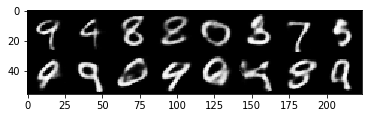

In [19]:
def make_squared_image(generated_images):
    N = len(generated_images)
    black_image = np.zeros(generated_images[0].shape, dtype=np.int32)
    w = int(np.minimum(10, np.sqrt(N)))
    h = int(np.ceil(N / w))

    one_row_image = generated_images[0]
    for j in range(1, w):
        one_row_image = np.concatenate((one_row_image, generated_images[j]), axis=1)

    image = one_row_image
    for i in range(1, h):
        one_row_image = generated_images[i*w]
    for j in range(1, w):
        try:
            one_row_image = np.concatenate((one_row_image, generated_images[i*w + j]), axis=1)
        except:
            one_row_image = np.concatenate((one_row_image, black_image), axis=1)
    image = np.concatenate((image, one_row_image), axis=0)

    return image

image = make_squared_image(generated_images)

plt.imshow(image / 255)

In [8]:
cv2.imwrite("img.png", image.astype(np.int8))

True

In [14]:
image

array([[[1.4555140e-14, 1.4555140e-14, 1.4555140e-14],
        [1.4670360e-14, 1.4670360e-14, 1.4670360e-14],
        [2.9882984e-14, 2.9882984e-14, 2.9882984e-14],
        ...,
        [2.6121723e-15, 2.6121723e-15, 2.6121723e-15],
        [8.8224442e-16, 8.8224442e-16, 8.8224442e-16],
        [2.2546268e-15, 2.2546268e-15, 2.2546268e-15]],

       [[9.4123216e-15, 9.4123216e-15, 9.4123216e-15],
        [4.9626127e-15, 4.9626127e-15, 4.9626127e-15],
        [4.1267568e-15, 4.1267568e-15, 4.1267568e-15],
        ...,
        [3.9182698e-15, 3.9182698e-15, 3.9182698e-15],
        [1.1668282e-15, 1.1668282e-15, 1.1668282e-15],
        [1.5298051e-15, 1.5298051e-15, 1.5298051e-15]],

       [[1.4420401e-14, 1.4420401e-14, 1.4420401e-14],
        [5.1823365e-15, 5.1823365e-15, 5.1823365e-15],
        [9.3383383e-35, 9.3383383e-35, 9.3383383e-35],
        ...,
        [7.7203145e-20, 7.7203145e-20, 7.7203145e-20],
        [1.0382421e-15, 1.0382421e-15, 1.0382421e-15],
        [9.4022330e-16